<a href="https://colab.research.google.com/github/DeaTHkinG02/Linear-Algebra/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import linalg,array,around,arange,linspace
from scipy.special import binom,factorial
from sympy import Matrix,Symbol,lambdify,print_latex
from matplotlib.pyplot import subplots,show

In [2]:
class Make_Fun():
    def __init__(self,data,power=False):
        self.data=data
        self.power=power

    def rightdata(self,xs,ys):
        return [list(tuple(zip(xs,ys)))]

    def wrongdata(self,data):
        xx,yy=[],[]
        for i in data[0]:
            xx.append(i[0])
            yy.append(i[1])
        return xx,yy

    def plotter(self,data_to_plot,data_to_scatter=[]):
        fig,ax=subplots()
        ax.set_facecolor('black')
        for i in data_to_plot:
            xx,yy=i
            ax.plot(xx,yy)
        for i in data_to_scatter:
            xx,yy=i
            ax.scatter(xx,yy,c='purple')
        return fig,ax

    def Vander(self,data=False,power=False):
        c=lambda j,k: factorial(j)/factorial(j-k) if j>=k else 0
        data=self.data if data== False else data
        power= power if powerIn > 0 else sum([len(i) for i in data])-1
        Vander,V=[],[]
        lk=len(data)
        for k in range(lk):
            lv=len(data[k])
            for n in range(lv):
                V.append(data[k][n][1])
                N=[(c(j,k)*data[k][n][0]**max((j-k),0)) for j in range(power+1)]
                Vander.append(N)
        return array(Vander),array(V)

    def fun(self,data=False,power=False,typefun='numfun'):
        data = self.data if data==False else data
        power= power if power > 0 else sum([len(i) for i in data])-1
        Vander,V=self.Vander(data=data,power=power)
        coefs=around(linalg.pinv(Vander)@V,10)
        if typefun=='numfun':
            x=arange(min([ i[0] for i in data[0]]),max([ i[0] for i in data[0]]),0.01)
        if typefun=='symfun':
            x=Symbol('x')
        function=sum([coefs[i]*x**i for i in range(len(coefs))])
        return x,function

    def interpol(self,data=False,power=False):
        data = self.data if data==False else data
        power= power if power > 0 else sum([len(i) for i in data])-1
        data_to_plot=[self.fun(power=power)]
        data_to_scatter=[self.wrongdata(data)]
        fig,_=self.plotter(data_to_plot,data_to_scatter)
        return fig,self.fun(data,power,'symfun')

    def casteljau(self,data=False):
        data=self.data if data== False else data
        n=len(data[0])-1
        tt=arange(0,1,0.01)
        if len(data)==1:
            t=Symbol('t')
            pols=[binom(n,k)*((1-t)**(n-k)*t**(k)) for k in range(n+1)]
            x,y=0,0
            xs,ys=[],[]
            for i in range(len(data[0])):
                dotx,doty=data[0][i][0],data[0][i][1]
                xs.append(dotx)
                ys.append(doty)
                x+=pols[i]*dotx
                y+=pols[i]*doty
        data_to_plot=[[lambdify('t',x)(tt),lambdify('t',y)(tt)]]
        data_to_scatter=[[xs,ys]]
        fig1,_=self.plotter(data_to_plot,data_to_scatter)
        return fig1

In [3]:
data=[[(2,-7),(-1,19),(0,-5),(1,7)]]
ex=Make_Fun(data)

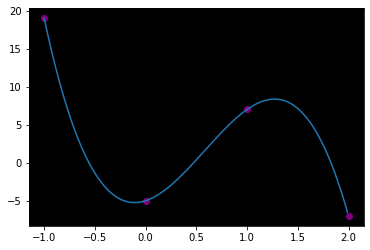

In [ ]:
fig,fun=ex.interpol() # makes interpolation of data

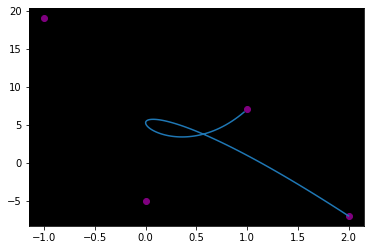

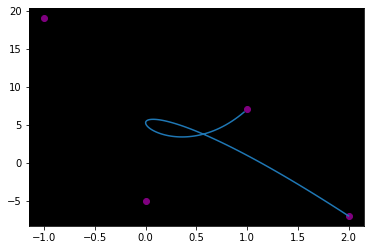

In [ ]:
ex.casteljau()  # implemented Bezier curve by Casteljau algorithm